In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (accuracy_score,recall_score,precision_score,confusion_matrix)

In [47]:
iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Splitting data into train and test

Labeling only two features [Virginica as True] and [Non-Verginica as false]

In [6]:
X = iris.data
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Training a logistic regression model

In [7]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [8]:
#Predicting the probability of the test data points
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba

array([[7.96014328e-01, 2.03985672e-01],
       [9.99991933e-01, 8.06676033e-06],
       [1.68962752e-03, 9.98310372e-01],
       [7.88230647e-01, 2.11769353e-01],
       [7.19220879e-01, 2.80779121e-01],
       [9.99992178e-01, 7.82176002e-06],
       [9.82501228e-01, 1.74987722e-02],
       [1.80900927e-01, 8.19099073e-01],
       [7.37507916e-01, 2.62492084e-01],
       [9.67192891e-01, 3.28071088e-02],
       [2.69093660e-01, 7.30906340e-01],
       [9.99995049e-01, 4.95087673e-06],
       [9.99997229e-01, 2.77120685e-06],
       [9.99994040e-01, 5.96027498e-06],
       [9.99994176e-01, 5.82372170e-06],
       [7.06574537e-01, 2.93425463e-01],
       [3.18271628e-02, 9.68172837e-01],
       [9.68061654e-01, 3.19383458e-02],
       [8.26116771e-01, 1.73883229e-01],
       [4.70954543e-02, 9.52904546e-01],
       [9.99990195e-01, 9.80534366e-06],
       [4.26347933e-01, 5.73652067e-01],
       [9.99988102e-01, 1.18976087e-05],
       [5.70537449e-02, 9.42946255e-01],
       [2.344674

In [9]:
#Printing the actual predictions and the probability of a random test data point
print(f'Actual outcome {y_test[1]}')
print(f'Predicted outcome probabilities {y_pred_proba[1]}')

Actual outcome False
Predicted outcome probabilities [9.99991933e-01 8.06676033e-06]


Which means the probability of being the second data point as non virginica is 99.999% and being virginca is close to 0.001 which explains the outcome "False"

In [10]:
#Predicting the outcome of the test data points
y_pred = log_reg.predict(X_test)
y_pred


array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False])

### To Evaluate performance of logistic regression, we can use a confusion matrix which will provide us with four values:
1. True Positives: Number of outcomes predicted as True are actually True
2. False Positives: Number of outcomes predicted as True are actually False
3. True Negavites: Number of outcomes predicted as False that are acually False
4. False Negatives: Number of outcomes predicted as False that are acually True

[[26  0]
 [ 0 12]]


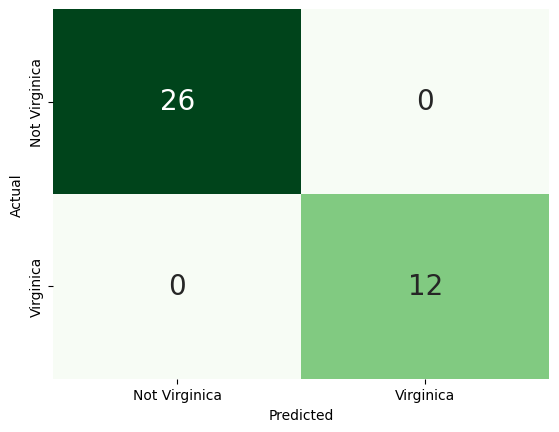

In [11]:
#Confusion matrix
confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

#Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d', cbar=False, xticklabels=['Not Virginica', 'Virginica'], yticklabels=['Not Virginica', 'Virginica'], annot_kws={"size": 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Which gives us the 4 values


TP=26     FN=0


FP=0      TN=12

From definition of precision:  $Precision = \frac{True \ Positives}{True \ Positives + False \ Positives}$ which gives the value of precision as 1

and from definition of recall: $Recall = \frac{True \ Positives}{True \ Positives + False \ Negatives}$ which gives us the value after manual calculation as 1.

In [12]:
#Printing the precision, recall and accuracy scores
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')


Precision score: 1.0
Recall score: 1.0
Accuracy score: 1.0


Which Confirms that the model is 100% accurate and precise and doesnt miss or get wrong in any data instance

As Dataset is balanced, having 50 datapoints for each class this accuracy and precision may be due to relatively small dataset as it contains only 150 datapoints may be the model is complex for this dataset and overfitted due to which it covers all the datapoints and made possible this 100% accuracy and precision 

Actual outcome False
Predicted outcome probabilities -0.012401466945661355
Precision score: 0.8571428571428571
Recall score: 1.0
Accuracy score: 0.9473684210526315
[[24  2]
 [ 0 12]]


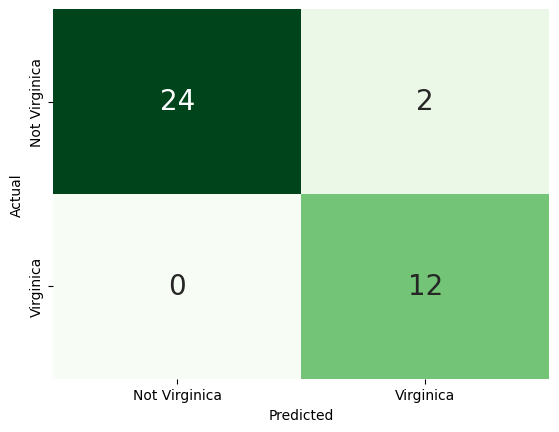

In [13]:
# Linear Regression on Iris Dataset
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred

#Printing the actual predictions and the probability of a random test data point
print(f'Actual outcome {y_test[1]}')
print(f'Predicted outcome probabilities {y_pred[1]}')

#Printing the precision, recall and accuracy scores
print(f'Precision score: {precision_score(y_test, y_pred.round())}')
print(f'Recall score: {recall_score(y_test, y_pred.round())}')
print(f'Accuracy score: {accuracy_score(y_test, y_pred.round())}')

#Confusion matrix
confusion_matrix(y_test, y_pred.round())
print(confusion_matrix(y_test, y_pred.round()))

#Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred.round()), annot=True, cmap='Greens', fmt='d', cbar=False, xticklabels=['Not Virginica', 'Virginica'], yticklabels=['Not Virginica', 'Virginica'], annot_kws={"size": 20})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [63]:
target = iris.target
features = iris.data

In [66]:
# Applying dummy encoding to the target as it is a categorical variable
target = pd.get_dummies(target)
target

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [68]:
target.value_counts()

0      1      2    
False  False  True     50
       True   False    50
True   False  False    50
Name: count, dtype: int64

In [89]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to create Keras model
def create_model():
    model = Sequential()
    # Add layers to your model
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store accuracy scores
scores = []

# Loop through each fold and train/evaluate the model
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    scores.append(accuracy)

# Print scores and mean accuracy
print(scores)
print("Mean Accuracy:", np.mean(scores))


[0.8333333134651184, 0.6666666865348816, 0.8999999761581421, 0.7333333492279053, 0.8999999761581421]
Mean Accuracy: 0.8066666603088379


In [93]:
# Predicting the probability of the test data points
y_pred_proba = model.predict(X_test)
y_pred_proba

#Printing the actual predictions and the probability of a random test data point
print(f'Actual outcome {y_test[1]}')
print(f'Predicted outcome probabilities {y_pred_proba[1]}')

1/1 [==============================] - 0s 12ms/step
Actual outcome 0
Predicted outcome probabilities [0.9566698  0.03273736 0.01059282]


In [96]:
# Convert the probabilities to actual predictions
y_pred = np.argmax(y_pred_proba, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2])

In [106]:
from sklearn.metrics import (accuracy_score,recall_score,precision_score,confusion_matrix,f1_score)
#Printing the precision, recall and accuracy scores
print(f'Precision score: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall score: {recall_score(y_test, y_pred, average="macro")}')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred, average="macro")}')

Precision score: 0.9285714285714285
Recall score: 0.9166666666666666
Accuracy score: 0.9
f1 score: 0.9123809523809524


In [103]:
# misclassified data points
misclassified = np.where(y_test != y_pred)
misclassified

# Printing the misclassified data points
print(f'Actual outcome {y_test[misclassified[0][0]]}')
print(f'Predicted outcome {y_pred[misclassified[0][0]]}')
print(f'Predicted outcome probabilities {y_pred_proba[misclassified[0][0]]}')

Actual outcome 2
Predicted outcome 1
Predicted outcome probabilities [0.01091027 0.5998826  0.38920715]


**Neural Network architecture works best on this dataset as it does not overfits on the data and allowed some data points to be misclassified**